---

# IT00CJ42: Search and Optimization Algorithms

**Restart the kernel and run all cells** before you turn this problem in, make sure everything runs as expected.

Make sure you fill in any place that says `YOUR CODE HERE`.

---

## Week 3
compare_two_algorithms is a python function to compare two optimization algorithms.<br>
<br>
First, it runs each algorithms ntrials number of times (100 by default), to obtain a sample of the minima returned<br>
by each algorithm. Then it shows the mean of each sample and uses a Mann-Whitney U rank test to determine if the two<br>
samples have the same underlying distribution.<br>
<br>
Your task is to implement the missing code

### Imports

In [13]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd

### Solutions check
We use the function **check** to implement tests for your solution

In [14]:
def check(expression, message=""):
    if not expression:
        raise AssertionError(message)
    return "Passed"

### Task 1: Plan the experiment
Run the algorithm passed as first parameter N times

In [15]:
def run_experiment(algorithm, N, initial_seed=1):
    data = []
    for i in range(N):
        # We set both the standard Python and Numpy random seeds
        # since we do not know which RNG algorithm uses
        random.seed(initial_seed+i)
        np.random.seed(initial_seed+i)

        # run algorithm and store the return value in a variable named result
        # YOUR CODE HERE
        result = algorithm()
        
        data.append(result)
    return data

In [16]:
check(run_experiment( (lambda: 0 ),30) == [0]*30)

'Passed'

Calculate a Two-sided Mann–Whitney U test

In [17]:
def statistical_test(name, vA, vB, significance=0.5):
    # Perform a two-side Mann–Whitney U test for vA and vB, store result in a variable named p
    # YOUR CODE HERE
    u_statistic,p = scipy.stats.mannwhitneyu(vA,vB,alternative='two-sided')
    print("The observed differences in the results of algorithm A and B for variable", name, "are ", end="")
    if p < significance:
        print("statistically significant.", end=" ")
    else:
        print("not statistically significant.", end=" ")
    print("Two-sided Mann–Whitney U test, significance level =", significance, ", p-value = ", p)
    return p

Run the experiment

In [18]:
check(statistical_test("Different",[1]*30,[0.5]*30) < 0.01)
check(statistical_test("Different",[1]*30,[1]*30) > 0.99)

The observed differences in the results of algorithm A and B for variable Different are statistically significant. Two-sided Mann–Whitney U test, significance level = 0.5 , p-value =  1.685298194892643e-14
The observed differences in the results of algorithm A and B for variable Different are not statistically significant. Two-sided Mann–Whitney U test, significance level = 0.5 , p-value =  1.0


'Passed'

In [19]:
def compare_two_algorithms(algorithm_A, algorithm_B, trials = 30):
    dataA = run_experiment(algorithm_A, trials, initial_seed=1)
    dataB = run_experiment(algorithm_B, trials, initial_seed=1)
    df = pd.DataFrame(data=np.transpose([ dataA, dataB]),
                      columns=[algorithm_A.__name__, algorithm_B.__name__])
    df.to_excel("experimental-data.xlsx")
    for alg, data in ( (algorithm_A,dataA), (algorithm_B,dataB)):
        plt.title(alg.__name__)
        
        # Plot a histogram with data
        plt.hist(data, bins=20, alpha=0.7)
        
        plt.show()
        print(alg.__name__, f'Mean: {np.mean(data)}, Standard deviation: {np.std(data)}\n')
    plt.title(algorithm_A.__name__+" vs "+algorithm_B.__name__)
    
    # Plot a boxplot with dataA and dataB
    plt.boxplot([dataA, dataB], labels=[algorithm_A.__name__, algorithm_B.__name__])
    
    plt.show()
    return statistical_test(algorithm_A.__name__+" vs "+algorithm_B.__name__, dataA, dataB, 0.05)

### Task 2: Compare two algorithms

Import random_search and hill_climbing from week 2

In [20]:
!pip install openpyxl
import math
def function_1(x):
    return 0.1 * x ** 2 + 10 * math.sin(3 * x)
def function_2(x):
    return 0.1 * x ** 2 + 4 * math.cos(math.pi / 2 + 2 * x)
def random_search(function = function_1, r_min_x = -100, r_max_x = 100, budget = 1000):
    """random_search minimization"""
    min_x = None
    min_y = None
    for i in range(budget):
        cur_x = np.random.uniform(r_min_x,r_max_x)
        cur_y = function(cur_x)
        if min_y == None or cur_y < min_y:
#             update the min_x and min_y
            min_x = cur_x
            min_y = cur_y
    return min_y

def hill_climbing(function = function_1, r_min_x = -10, r_max_x = 10, budget = 1000):
    """hill_climbing minimization"""
    min_x = None
    min_y = None
    delta =(r_max_x - r_min_x) / budget
    
    min_x = np.random.uniform(r_min_x, r_max_x)
    min_y = function(min_x)
    for i in range((int)(budget/3)):
        y_right = function(min_x+delta)
        y_left = function(min_x-delta)
        
#         there are 2 cases: 1. left >= right, 2. left < right
#         check the left and right neighbor of y
        if min_x + delta < r_max_x and min_x - delta > r_min_x and y_right < min_y and y_left >= y_right:
        # if min_x + delta < r_max_x and y_right < min_y and min_x - delta > r_min_x and y_left >= y_right:

#         decreasing zone, left >= righ
            min_x = min_x + delta
            min_y = y_right
        elif min_x - delta > r_min_x and y_left < min_y: 
#         increasing zone left <= right
#         search leftward, if current min_x - delta still more than r_min_x
#         set new min_x as min_x - delta
#         set new min_y
            min_x = min_x - delta
            min_y = y_left
        else:
#           after some iterations, new min_x exceeds the boundary
#           random helps to jump out the region min
            alternative_x = np.random.uniform(r_min_x, r_max_x)
            alternative_y = function(alternative_x)
            if alternative_y < min_y:
                min_x = alternative_x
                min_y = alternative_y
    
    return min_y


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


Compare random_search with hill_climbing for function_2 in the range -10, 10

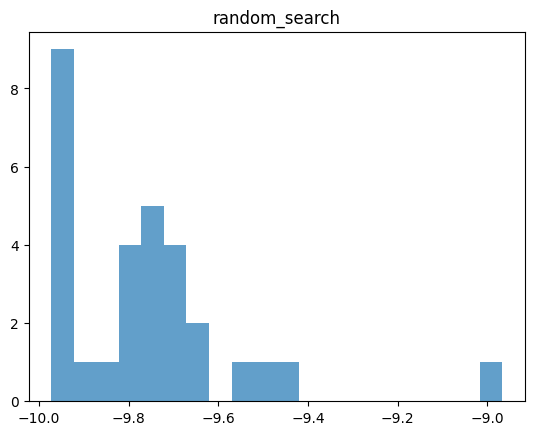

random_search Mean: -9.75999796740707, Standard deviation: 0.20647199260761082



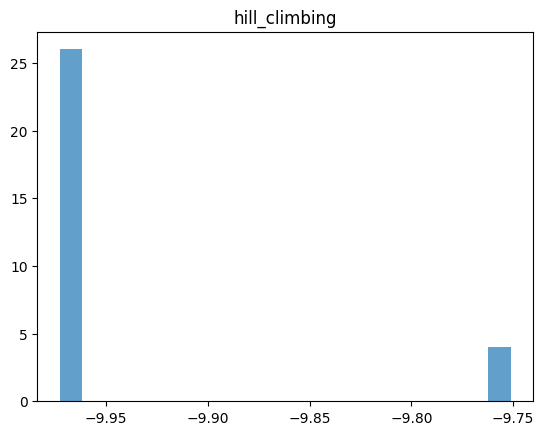

hill_climbing Mean: -9.942204400097033, Standard deviation: 0.07435656533829783



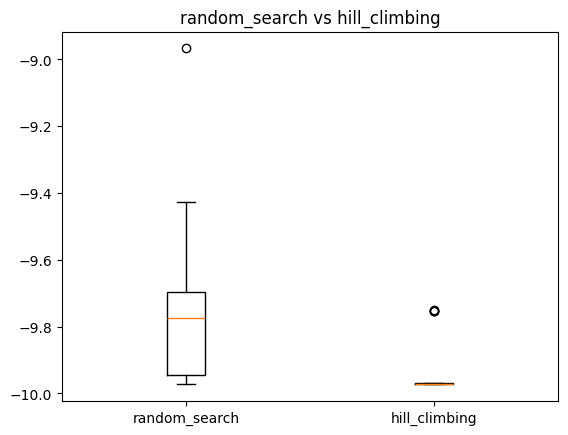

The observed differences in the results of algorithm A and B for variable random_search vs hill_climbing are statistically significant. Two-sided Mann–Whitney U test, significance level = 0.05 , p-value =  4.4440478739951943e-07


'Passed'

In [21]:
check(compare_two_algorithms(random_search, hill_climbing))

Implement two versions of hill_climbing with different step values. Use compare_two_algorithms to determine<br>
what version performs better

In [22]:
def hill_climbing_v1(function = function_1, r_min_x = -100, r_max_x = 100, budget = 1000):
    """hill_climbing minimization"""
    min_x = None
    min_y = None
    # here, delta is the step values
    delta = ( r_max_x - r_min_x ) / budget

    min_x = np.random.uniform(r_min_x, r_max_x)
    min_y = function(min_x)
    for i in range((int)(budget/3)):
        y_right = function(min_x+delta)
        y_left = function(min_x-delta)
        
#         there are 2 cases: 1. left >= right, 2. left < right
#         check the left and right neighbor of y
        if min_x + delta < r_max_x and min_x - delta > r_min_x and y_right < min_y and y_left >= y_right:
        # if min_x + delta < r_max_x and y_right < min_y and min_x - delta > r_min_x and y_left >= y_right:

#         decreasing zone, left >= righ
            min_x = min_x + delta
            min_y = y_right
        elif min_x - delta > r_min_x and y_left < min_y: 
#         increasing zone left <= right
#         search leftward, if current min_x - delta still more than r_min_x
#         set new min_x as min_x - delta
#         set new min_y
            min_x = min_x - delta
            min_y = y_left
        else:
#           after some iterations, new min_x exceeds the boundary
#           random helps to jump out the region min
            alternative_x = np.random.uniform(r_min_x, r_max_x)
            alternative_y = function(alternative_x)
            if alternative_y < min_y:
                min_x = alternative_x
                min_y = alternative_y
    
    return min_y

def hill_climbing_v2(function = function_1, r_min_x = -100, r_max_x = 100, budget = 1000):
    """hill_climbing minimization"""
    min_x = None
    min_y = None
    # this time I make the step half the length compared to v1
    delta = ( r_max_x - r_min_x ) / ( budget * 2 )

    min_x = np.random.uniform(r_min_x, r_max_x)
    min_y = function(min_x)
    for i in range((int)(budget/3)):
        y_right = function(min_x+delta)
        y_left = function(min_x-delta)
        
#         there are 2 cases: 1. left >= right, 2. left < right
#         check the left and right neighbor of y
        if min_x + delta < r_max_x and min_x - delta > r_min_x and y_right < min_y and y_left >= y_right:
        # if min_x + delta < r_max_x and y_right < min_y and min_x - delta > r_min_x and y_left >= y_right:

#         decreasing zone, left >= righ
            min_x = min_x + delta
            min_y = y_right
        elif min_x - delta > r_min_x and y_left < min_y: 
#         increasing zone left <= right
#         search leftward, if current min_x - delta still more than r_min_x
#         set new min_x as min_x - delta
#         set new min_y
            min_x = min_x - delta
            min_y = y_left
        else:
#           after some iterations, new min_x exceeds the boundary
#           random helps to jump out the region min
            alternative_x = np.random.uniform(r_min_x, r_max_x)
            alternative_y = function(alternative_x)
            if alternative_y < min_y:
                min_x = alternative_x
                min_y = alternative_y
    
    return  min_y

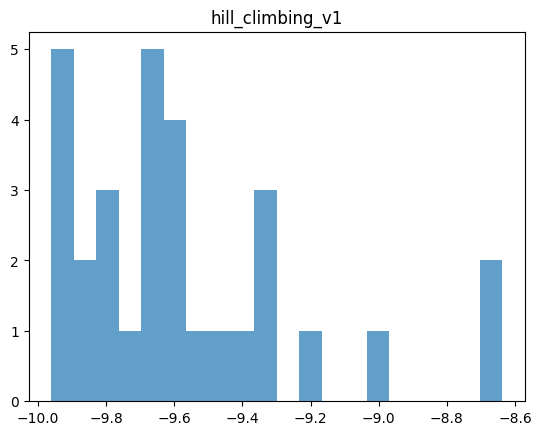

hill_climbing_v1 Mean: -9.576657060766488, Standard deviation: 0.33865790344402297



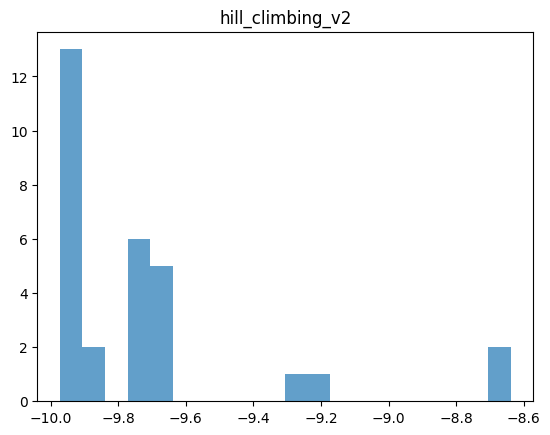

hill_climbing_v2 Mean: -9.72234359924579, Standard deviation: 0.3431154727328819



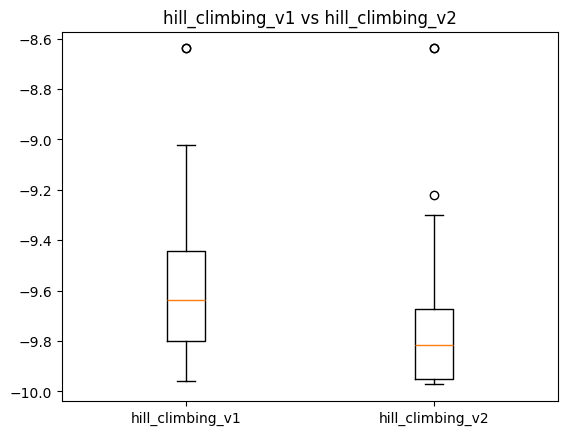

The observed differences in the results of algorithm A and B for variable hill_climbing_v1 vs hill_climbing_v2 are statistically significant. Two-sided Mann–Whitney U test, significance level = 0.05 , p-value =  0.011454352060603815


'Passed'

In [23]:
check(compare_two_algorithms(hill_climbing_v1, hill_climbing_v2))

Which one has the better step value?

In [25]:
# YOUR CODE HERE
result_v1 = hill_climbing_v1(function_2, -10, 10, 100)
result_v2 = hill_climbing_v2(function_2, -10, 10, 100)

if result_v1 < result_v2:
    print("hill_climbing_v1 has the better step value.")
elif result_v2 < result_v1:
    print("hill_climbing_v2 has the better step value.")
else:
    print("Both versions have achieved the same result.")

hill_climbing_v2 has the better step value.
